In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/cleanedData.csv')
df.head(5)

/opt/homebrew/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,psyte_PSYTECategoryCode,psyte_PSYTEGroupCode,psyte_censusBlock,psyte_censusBlockGroup,psyte_censusBlockPopulation,psyte_censusBlockHouseholds,psyte_PSYTESegmentCode.description,psyte_householdIncomeVariable.value,psyte_householdIncomeVariable.description,psyte_propertyValueVariable.value,...,BathroomCount,SaleAmount,ParcelID,ParcelArea,Elevation,Geometry,BuildingID,MaxElevation,MinElevation,BuildingArea
0,4.0,10,1.200500e+14,1.200500e+11,98.0,43.0,Rustic Blue Collar,AAV,Top 30-50% of households by household income,B30,...,2.0,190000.0,C000CU7NQDWH,10043.0,22.0,"{""type"":""MultiPolygon"",""coordinates"":[[[[-85.5...",B000CTQ7NH6K,22.0,21.0,767.0
1,6.0,7,1.200500e+14,1.200500e+11,292.0,106.0,Middle Class Commuter Families,AAV,Top 30-50% of households by household income,AAV,...,2.0,190000.0,C000CU68TC6Y,133866.0,35.0,"{""type"":""MultiPolygon"",""coordinates"":[[[[-85.5...",B000CTQ7ODGR,38.0,38.0,746.0
2,7.0,8,1.200500e+14,1.200500e+11,62.0,17.0,Rural Family Values,AAV,Top 30-50% of households by household income,B30,...,1.0,15900.0,C000CU5U8R2A,48606.0,58.0,"{""type"":""MultiPolygon"",""coordinates"":[[[[-85.5...",B000CTQ7LAHQ,60.0,59.0,3645.0
3,3.0,11,1.200500e+14,1.200500e+11,62.0,25.0,Not Classified,BAV,Bottom 30-49.99% of households by household in...,B20,...,2.0,312000.0,C000CU63SFZO,7517.0,37.0,"{""type"":""MultiPolygon"",""coordinates"":[[[[-85.5...",B000CTQ7PHDC,28.0,27.0,2271.0
4,0.0,NC,1.200500e+14,1.200500e+11,0.0,0.0,Not Classified,NC0,Not Classified,NC0,...,2.0,190000.0,C000CU677ECE,1061634.0,56.0,"{""type"":""MultiPolygon"",""coordinates"":[[[[-85.5...",B000CTSOYF2O,56.0,55.0,3994.0


In [2]:
categorical_cols = ['psyte_PSYTEGroupCode', 'psyte_PSYTESegmentCode.description',
       'psyte_householdIncomeVariable.description',
       'psyte_propertyValueVariable.description',
       'psyte_propertyTenureVariable.description',
       'psyte_propertyTypeVariable.description',
       'psyte_urbanRuralVariable.description',
       'coastal_waterbodyName',
       'coastal_nearestWaterbodyAdjacentName', 'LOC_CODE']

numeerical_clos = ['coastal_nearestWaterbodyCounty','coastal_nearestWaterbodyAdjacentType',
       'coastal_distanceToNearestCoastFeet',
       'coastal_nearestWaterbodyType.value','ZIPCODE', 'PLUS4','LivingSquareFootage', 'BedroomCount',
       'BathroomCount', 'SaleAmount', 'ParcelArea', 'Elevation',
       'MaxElevation', 'MinElevation', 'BuildingArea']
       


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

def set_custom_theme():
    """Set custom theme for all visualizations"""
    plt.style.use('seaborn-darkgrid')
    colors = ['#2C3E50', '#E74C3C', '#ECF0F1', '#3498DB', '#2ECC71', '#F1C40F']
    sns.set_palette(colors)
    
    plt.rcParams['figure.facecolor'] = 'white'
    plt.rcParams['axes.facecolor'] = 'white'
    plt.rcParams['text.color'] = 'black'
    plt.rcParams['axes.labelcolor'] = 'white'
    plt.rcParams['xtick.color'] = 'black'
    plt.rcParams['ytick.color'] = 'black'
    plt.rcParams['axes.grid'] = True
    plt.rcParams['grid.color'] = '#3d3d3d'

def create_property_value_analysis(df):
    """Create property value scatter plot"""
    set_custom_theme()
    plt.figure(figsize=(12, 8))
    
    sns.scatterplot(
        data=df,
        x='LivingSquareFootage',
        y='SaleAmount',
        hue='psyte_propertyTypeVariable.description',
        size='ParcelArea',
        sizes=(50, 400),
        alpha=0.7
    )
    plt.title('Property Value Analysis', pad=20, fontsize=14)
    plt.xlabel('Living Square Footage')
    plt.ylabel('Sale Amount')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    return plt.gcf()

def create_property_type_distribution(df):
    """Create property type distribution bar plot"""
    set_custom_theme()
    plt.figure(figsize=(12, 8))
    
    property_type_counts = df['psyte_propertyTypeVariable.description'].value_counts()
    sns.barplot(
        x=property_type_counts.values,
        y=property_type_counts.index,
        palette='viridis'
    )
    plt.title('Property Type Distribution', pad=20, fontsize=14)
    plt.xlabel('Count')
    
    plt.tight_layout()
    return plt.gcf()

def create_coastal_distance_analysis(df):
    """Create coastal distance box plot"""
    set_custom_theme()
    plt.figure(figsize=(12, 8))
    
    sns.boxplot(
        data=df,
        x='psyte_urbanRuralVariable.description',
        y='coastal_distanceToNearestCoastFeet',
        palette='coolwarm'
    )
    plt.title('Coastal Distance by Urban/Rural Classification', pad=20, fontsize=14)
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    return plt.gcf()

def create_elevation_analysis(df):
    """Create elevation vs sale amount scatter plot"""
    set_custom_theme()
    plt.figure(figsize=(12, 8))
    
    sns.scatterplot(
        data=df,
        x='Elevation',
        y='SaleAmount',
        hue='coastal_distanceToNearestCoastFeet',
        size='LivingSquareFootage',
        sizes=(50, 400),
        palette='viridis'
    )
    plt.title('Elevation vs Sale Amount', pad=20, fontsize=14)
    
    plt.tight_layout()
    return plt.gcf()

def create_income_property_heatmap(df):
    """Create income vs property value heatmap"""
    set_custom_theme()
    plt.figure(figsize=(15, 10))
    
    custom_cmap = LinearSegmentedColormap.from_list(
        'custom_cmap',
        ['#1a1a1a', '#3498DB', '#E74C3C']
    )
    
    income_property_pivot = pd.crosstab(
        df['psyte_householdIncomeVariable.description'],
        df['psyte_propertyValueVariable.description']
    )
    
    sns.heatmap(
        income_property_pivot,
        cmap=custom_cmap,
        annot=True,
        fmt='d',
        cbar_kws={'label': 'Count'}
    )
    plt.title('Household Income vs Property Value Distribution', pad=20, fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    
    plt.tight_layout()
    return plt.gcf()

def create_correlation_matrix(df):
    """Create correlation matrix heatmap"""
    set_custom_theme()
    plt.figure(figsize=(12, 8))
    
    numerical_cols = ['LivingSquareFootage', 'BedroomCount', 'BathroomCount', 
                     'SaleAmount', 'ParcelArea', 'Elevation', 
                     'coastal_distanceToNearestCoastFeet']
    
    corr_matrix = df[numerical_cols].corr()
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    custom_cmap = LinearSegmentedColormap.from_list(
        'custom_cmap',
        ['#E74C3C', '#ECF0F1', '#3498DB']
    )
    
    sns.heatmap(
        corr_matrix,
        mask=mask,
        cmap=custom_cmap,
        vmin=-1,
        vmax=1,
        center=0,
        square=True,
        annot=True,
        fmt='.2f',
        cbar_kws={'label': 'Correlation Coefficient'}
    )
    
    plt.title('Correlation Matrix of Key Metrics', pad=20, fontsize=14)
    plt.tight_layout()
    return plt.gcf()

/var/folders/fj/r2kb_f4d3k1gxmcwsdc81_1r0000gn/T/ipykernel_45843/2477612180.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
/var/folders/fj/r2kb_f4d3k1gxmcwsdc81_1r0000gn/T/ipykernel_45843/2477612180.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
/var/folders/fj/r2kb_f4d3k1gxmcwsdc81_1r0000gn/T/ipykernel_45843/2477612180.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to t

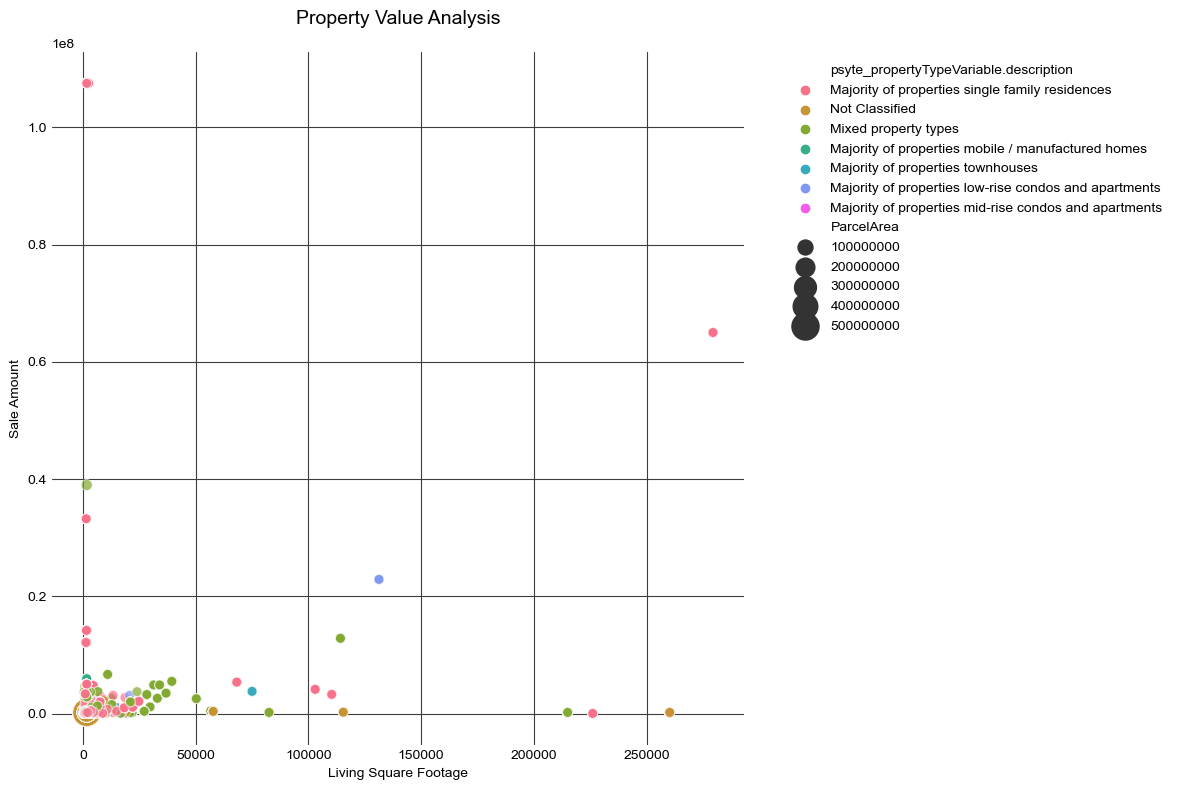

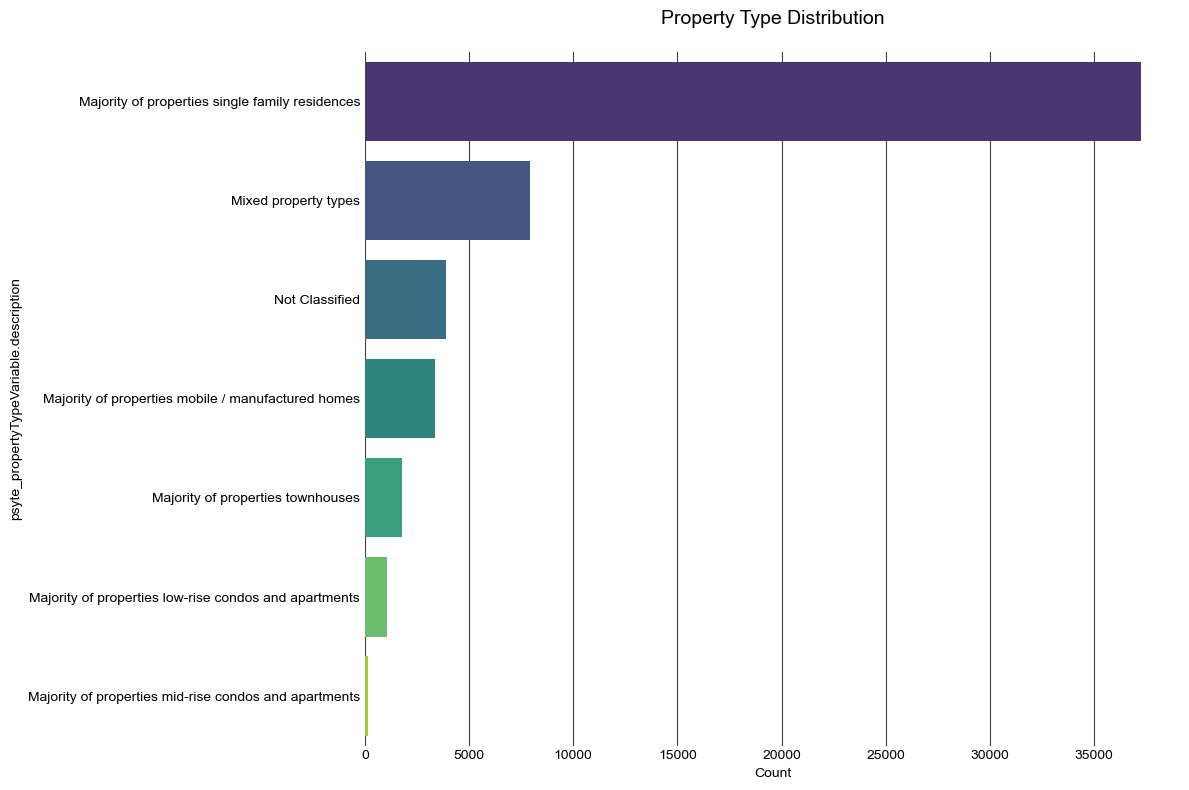

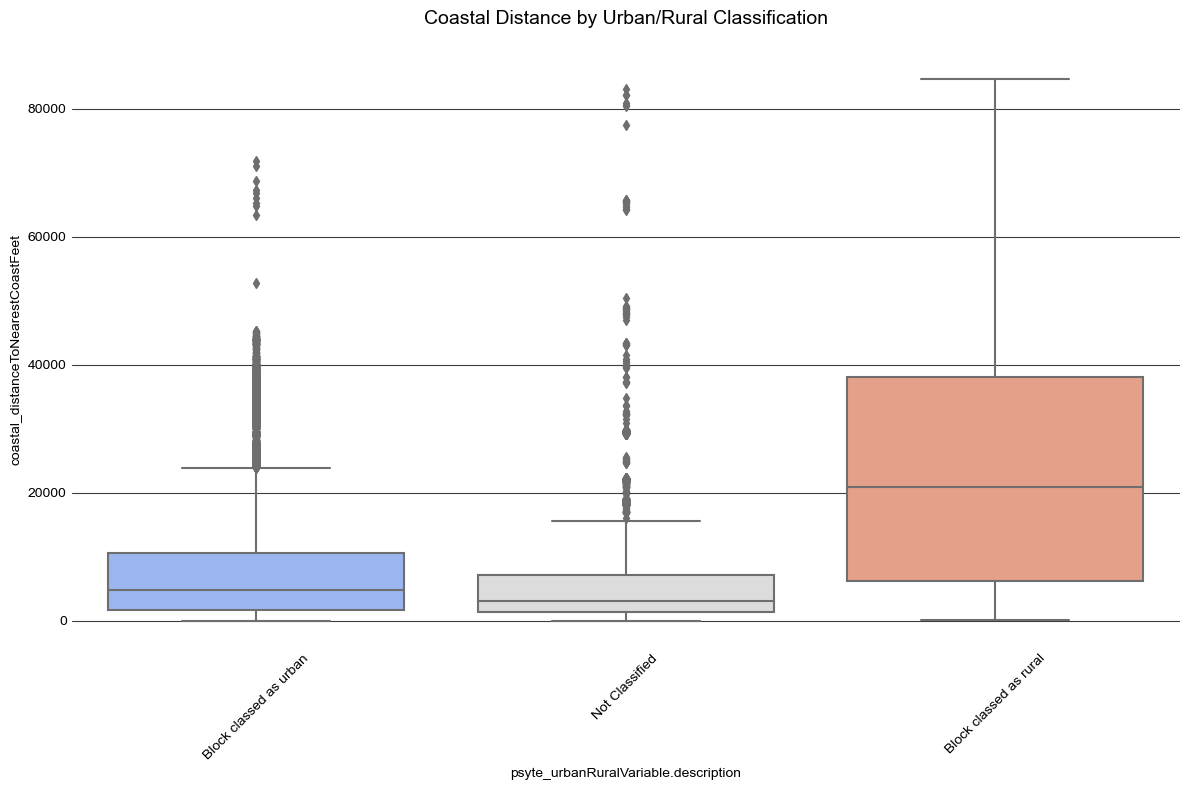

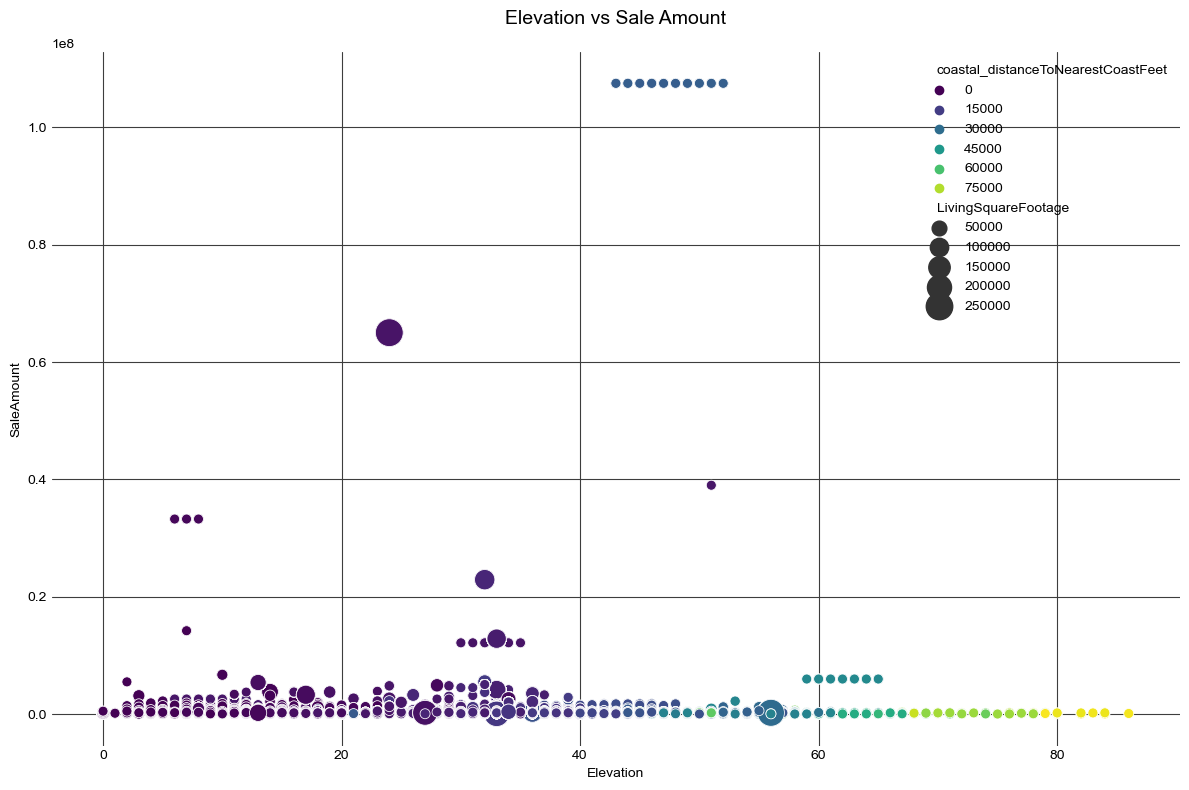

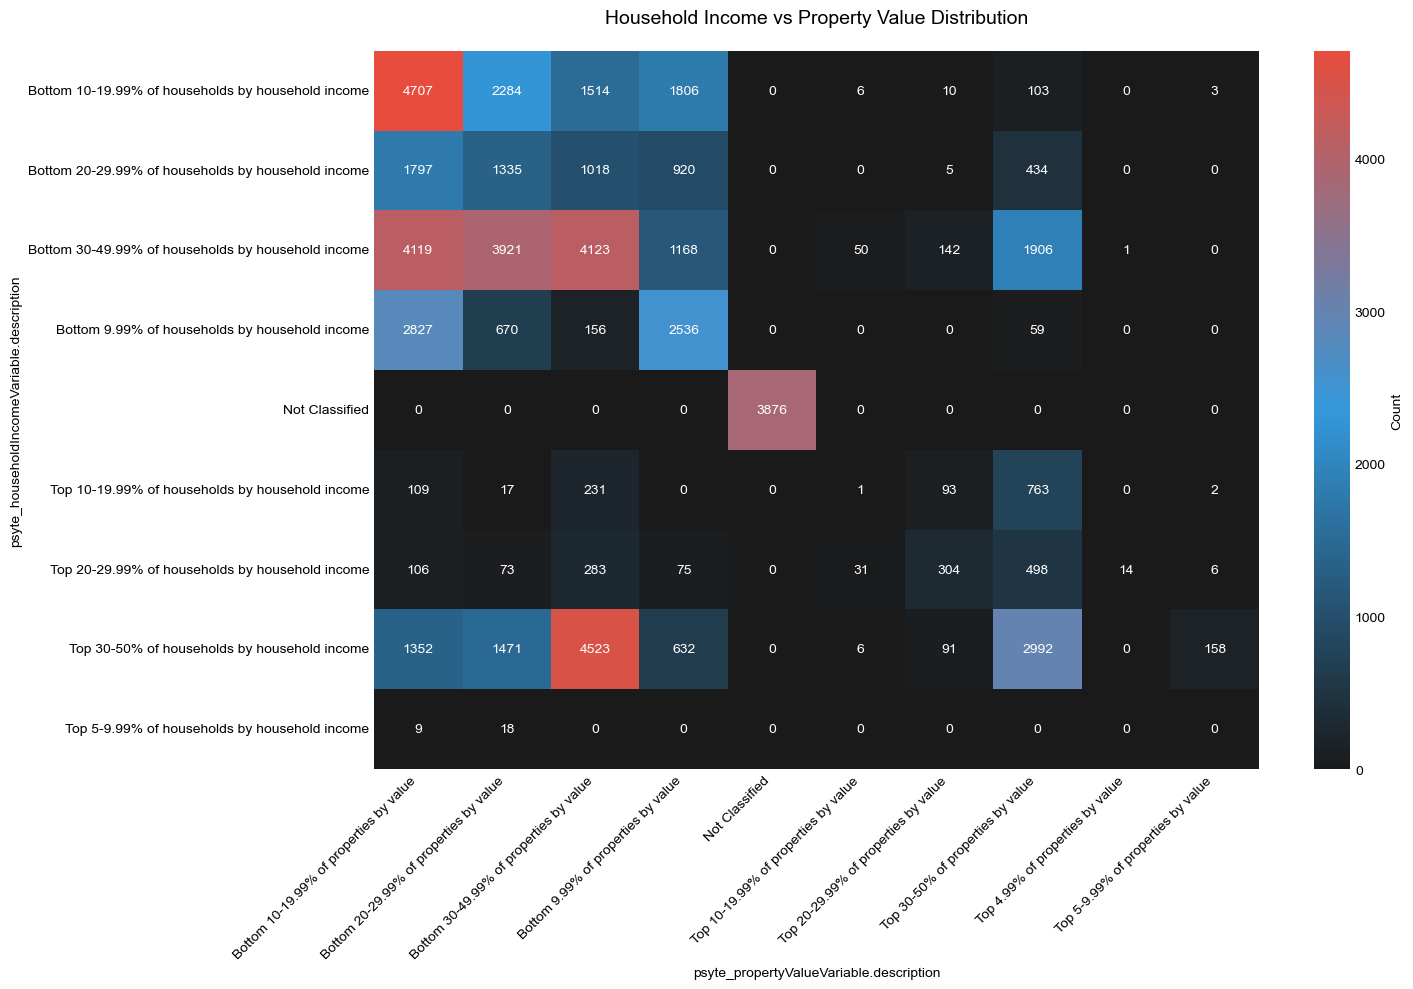

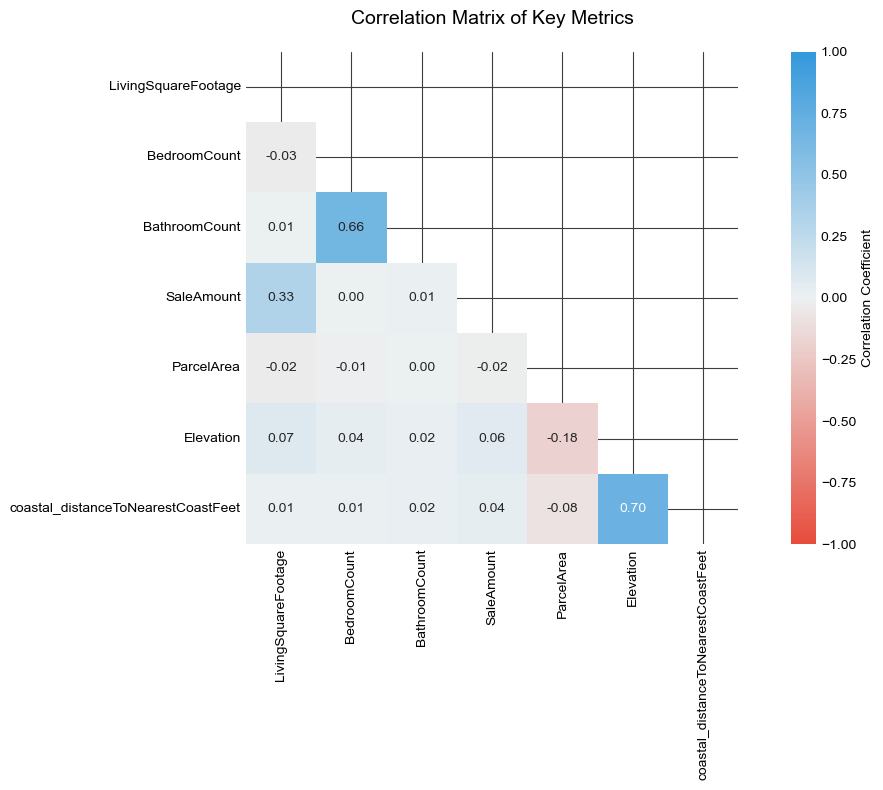

In [9]:
property_value_plot = create_property_value_analysis(df)
property_dist_plot = create_property_type_distribution(df)
coastal_dist_plot = create_coastal_distance_analysis(df)
elevation_plot = create_elevation_analysis(df)
income_property_plot = create_income_property_heatmap(df)
correlation_plot = create_correlation_matrix(df)

/var/folders/fj/r2kb_f4d3k1gxmcwsdc81_1r0000gn/T/ipykernel_45843/2248574540.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


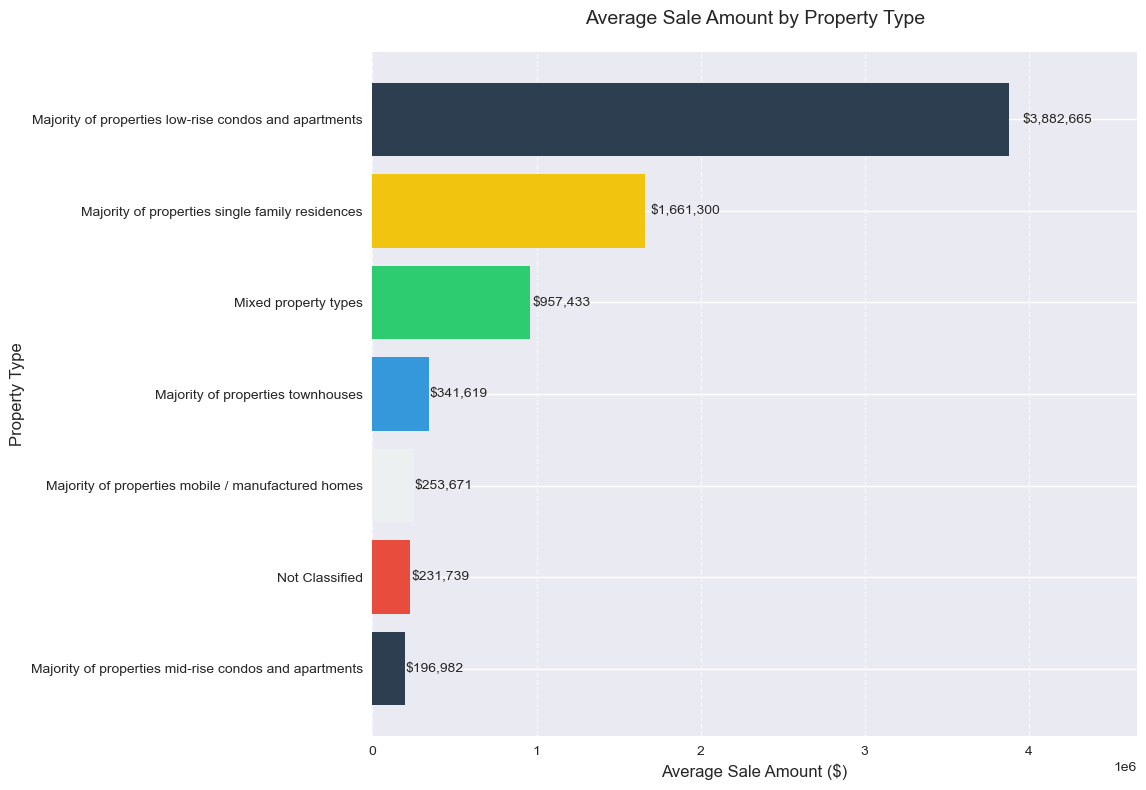

In [15]:
def create_average_sale_plot(df):
    """Create a horizontal bar plot of average sale amount by property type with color coding"""
    # Set figure style
    plt.style.use('seaborn')
    plt.figure(figsize=(12, 8))
    
    # Calculate average sale amount by property type
    avg_sales = df.groupby('psyte_propertyTypeVariable.description')['SaleAmount'].mean().sort_values(ascending=True)
    
    # Define colors - from low to high values
    colors = ['#2C3E50', '#E74C3C', '#ECF0F1', '#3498DB', '#2ECC71', '#F1C40F']
    
    # Create horizontal bar plot
    bars = plt.barh(
        range(len(avg_sales)), 
        avg_sales.values,
        color=colors[:len(avg_sales)]  # Use different colors for each bar
    )
    
    # Customize the plot
    plt.title('Average Sale Amount by Property Type', fontsize=14, pad=20)
    plt.xlabel('Average Sale Amount ($)', fontsize=12)
    plt.ylabel('Property Type', fontsize=12)
    
    # Set y-axis labels
    plt.yticks(
        range(len(avg_sales)), 
        avg_sales.index,
        fontsize=10
    )
    
    # Add value labels on the bars
    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(
            width + width*0.02,  # Slightly offset from the end of the bar
            bar.get_y() + bar.get_height()/2,
            f'${width:,.0f}',
            ha='left',
            va='center',
            fontsize=10
        )
    
    # Adjust layout and display
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    # Add some padding to the right for value labels
    plt.margins(x=0.2)
    
    return plt.gcf()

# Example usage:
property_value_plot = create_average_sale_plot(df)
plt.show()

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

def set_visualization_theme():
    """Set visualization theme for consistency"""
    plt.style.use('seaborn-darkgrid')
    colors = ['#2C3E50', '#E74C3C', '#ECF0F1', '#3498DB', '#2ECC71', '#F1C40F']
    sns.set_palette(colors)
    
    plt.rcParams['figure.facecolor'] = 'white'
    plt.rcParams['axes.facecolor'] = 'white'
    plt.rcParams['text.color'] = 'black'
    plt.rcParams['axes.labelcolor'] = 'black'
    plt.rcParams['xtick.color'] = 'white'
    plt.rcParams['ytick.color'] = 'white'
    plt.rcParams['axes.grid'] = True
    plt.rcParams['grid.color'] = '#3d3d3d'

def plot_property_value_distribution(df):
    """Create property types by value categories plot with improved readability"""
    set_visualization_theme()
    plt.figure(figsize=(24, 12))
    
    # Create the crosstab
    property_value_type = pd.crosstab(
        df['psyte_propertyTypeVariable.description'],
        df['psyte_propertyValueVariable.description']
    )
    
    # Create shorter, clearer labels for property types
    property_type_mapping = {
        'Majority of properties single family residences': 'Single Family Homes',
        'Majority of properties mobile / manufactured homes': 'Mobile/Manufactured Homes',
        'Majority of properties townhouses': 'Townhouses',
        'Majority of properties low-rise condos and apartments': 'Low-Rise Condos/Apts',
        'Majority of properties mid-rise condos and apartments': 'Mid-Rise Condos/Apts',
        'Mixed property types': 'Mixed Properties',
        'Not Classified': 'Unclassified'
    }
    
    # Apply the mapping to index
    property_value_type.index = [property_type_mapping.get(x, x) for x in property_value_type.index]
    
    # Create the plot with enhanced styling
    ax = property_value_type.plot(
        kind='bar',
        stacked=True,
        colormap='viridis',
        figsize=(24, 12)
    )
    
    # Customize the plot
    plt.title('Distribution of Property Types Across Value Categories', pad=20, fontsize=16)
    plt.xlabel('Property Types', fontsize=14)
    plt.ylabel('Number of Properties', fontsize=14)
    
    # Adjust x-axis labels
    plt.xticks(rotation=30, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    
    # Enhance legend
    plt.legend(
        title='Value Category',
        bbox_to_anchor=(1.05, 1),
        loc='upper left',
        fontsize=12,
        title_fontsize=14
    )
    
    # Add grid for better readability
    plt.grid(True, axis='y', alpha=0.3)
    
    # Adjust layout
    plt.tight_layout()
    return plt.gcf()

def plot_bedroom_bathroom_distribution(df):
    """Create bedroom vs bathroom distribution heatmap"""
    set_visualization_theme()
    plt.figure(figsize=(24, 12))
    
    bedroom_bathroom = pd.crosstab(
        df['BedroomCount'],
        df['BathroomCount']
    )
    sns.heatmap(
        bedroom_bathroom,
        cmap='YlOrRd',
        annot=True,
        fmt='d'
    )
    plt.title('Bedroom vs Bathroom Distribution', pad=20, fontsize=14)
    
    plt.tight_layout()
    return plt.gcf()

def plot_urban_rural_property_distribution(df):
    """Create urban/rural property type distribution"""
    set_visualization_theme()
    plt.figure(figsize=(24, 12))
    
    urban_property_type = pd.crosstab(
        df['psyte_urbanRuralVariable.description'],
        df['psyte_propertyTypeVariable.description']
    )
    urban_property_type.plot(
        kind='bar',
        stacked=True,
        colormap='viridis'
    )
    plt.title('Urban/Rural Classification by Property Types', pad=20, fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(title='Property Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    return plt.gcf()

def plot_income_property_distribution(df):
    """Create income by property type distribution with improved readability"""
    set_visualization_theme()
    plt.figure(figsize=(24, 12))
    
    # Create the crosstab
    income_property = pd.crosstab(
        df['psyte_householdIncomeVariable.description'],
        df['psyte_propertyTypeVariable.description']
    )
    
    # Sort income categories in a logical order
    income_order = [
        'Bottom 9.99% of households by household income',
        'Bottom 10-19.99% of households by household income',
        'Bottom 20-29.99% of households by household income',
        'Bottom 30-49.99% of households by household income',
        'Top 30-50% of households by household income',
        'Top 20-29.99% of households by household income',
        'Top 10-19.99% of households by household income',
        'Top 5-9.99% of households by household income'
    ]
    
    # Reindex and create shorter labels
    income_property = income_property.reindex(income_order)
    income_property.index = [
        'Bottom 0-10%',
        'Bottom 10-20%',
        'Bottom 20-30%',
        'Bottom 30-50%',
        'Top 30-50%',
        'Top 20-30%',
        'Top 10-20%',
        'Top 5-10%'
    ]
    
    # Create the stacked bar plot
    ax = income_property.plot(
        kind='bar',
        stacked=True,
        colormap='viridis',
        figsize=(24, 12)
    )
    
    # Customize the plot
    plt.title('Household Income Distribution by Property Types', pad=20, fontsize=16)
    plt.xlabel('Income Brackets', fontsize=14)
    plt.ylabel('Number of Properties', fontsize=14)
    
    # Adjust x-axis labels
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    
    # Adjust legend
    plt.legend(
        title='Property Type',
        bbox_to_anchor=(1.05, 1),
        loc='upper left',
        fontsize=12,
        title_fontsize=14
    )
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    return plt.gcf()

def plot_coastal_distance_distribution(df):
    """Create coastal distance distribution by urban/rural"""
    set_visualization_theme()
    plt.figure(figsize=(24, 12))
    
    df['distance_category'] = pd.qcut(
        df['coastal_distanceToNearestCoastFeet'],
        q=5,
        labels=['Very Close', 'Close', 'Medium', 'Far', 'Very Far']
    )
    coastal_urban = pd.crosstab(
        df['psyte_urbanRuralVariable.description'],
        df['distance_category']
    )
    coastal_urban.plot(
        kind='bar',
        stacked=True,
        colormap='viridis'
    )
    plt.title('Urban/Rural Areas by Coastal Distance', pad=20, fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(title='Distance Category', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    return plt.gcf()

def plot_elevation_property_distribution(df):
    """Create elevation categories by property type"""
    set_visualization_theme()
    plt.figure(figsize=(24, 12))
    
    df['elevation_category'] = pd.qcut(
        df['Elevation'],
        q=5,
        labels=['Very Low', 'Low', 'Medium', 'High', 'Very High']
    )
    elevation_property = pd.crosstab(
        df['elevation_category'],
        df['psyte_propertyTypeVariable.description']
    )
    elevation_property.plot(
        kind='bar',
        stacked=True,
        colormap='viridis'
    )
    plt.title('Elevation Categories by Property Types', pad=20, fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(title='Property Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    return plt.gcf()

def plot_zip_code_property_distribution(df):
    """Create ZIP code by property type distribution"""
    set_visualization_theme()
    plt.figure(figsize=(24, 12))
    
    top_zips = df['ZIPCODE'].value_counts().head(10).index
    zip_property = pd.crosstab(
        df[df['ZIPCODE'].isin(top_zips)]['ZIPCODE'],
        df[df['ZIPCODE'].isin(top_zips)]['psyte_propertyTypeVariable.description']
    )
    zip_property.plot(
        kind='bar',
        stacked=True,
        colormap='viridis'
    )
    plt.title('Top 10 ZIP Codes by Property Types', pad=20, fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(title='Property Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    return plt.gcf()

def plot_income_value_distribution(df):
    """Create household income by property value distribution"""
    set_visualization_theme()
    plt.figure(figsize=(24, 12))
    
    df['value_category'] = pd.qcut(
        df['SaleAmount'],
        q=5,
        labels=['Very Low', 'Low', 'Medium', 'High', 'Very High']
    )
    value_distribution = pd.crosstab(
        df['psyte_householdIncomeVariable.description'],
        df['value_category']
    )
    value_distribution.plot(
        kind='bar',
        stacked=True,
        colormap='viridis'
    )
    plt.title('Household Income Distribution by Property Value Categories', pad=20, fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(title='Property Value Category', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    return plt.gcf()

def generate_statistical_summary(df):
    """Generate statistical summary of key metrics"""
    summary_stats = {}
    
    # Value metrics
    summary_stats['value_metrics'] = df['SaleAmount'].describe()
    
    # Property distribution
    summary_stats['property_distribution'] = df['psyte_propertyTypeVariable.description'].value_counts()
    
    # Location metrics
    summary_stats['coastal_distance'] = df['coastal_distanceToNearestCoastFeet'].describe()
    
    # Size metrics
    summary_stats['size_metrics'] = df[['LivingSquareFootage', 'BedroomCount', 'BathroomCount']].describe()
    
    return summary_stats

/var/folders/fj/r2kb_f4d3k1gxmcwsdc81_1r0000gn/T/ipykernel_45843/3135661283.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
/var/folders/fj/r2kb_f4d3k1gxmcwsdc81_1r0000gn/T/ipykernel_45843/3135661283.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
/var/folders/fj/r2kb_f4d3k1gxmcwsdc81_1r0000gn/T/ipykernel_45843/3135661283.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to t

<Figure size 2400x1200 with 0 Axes>

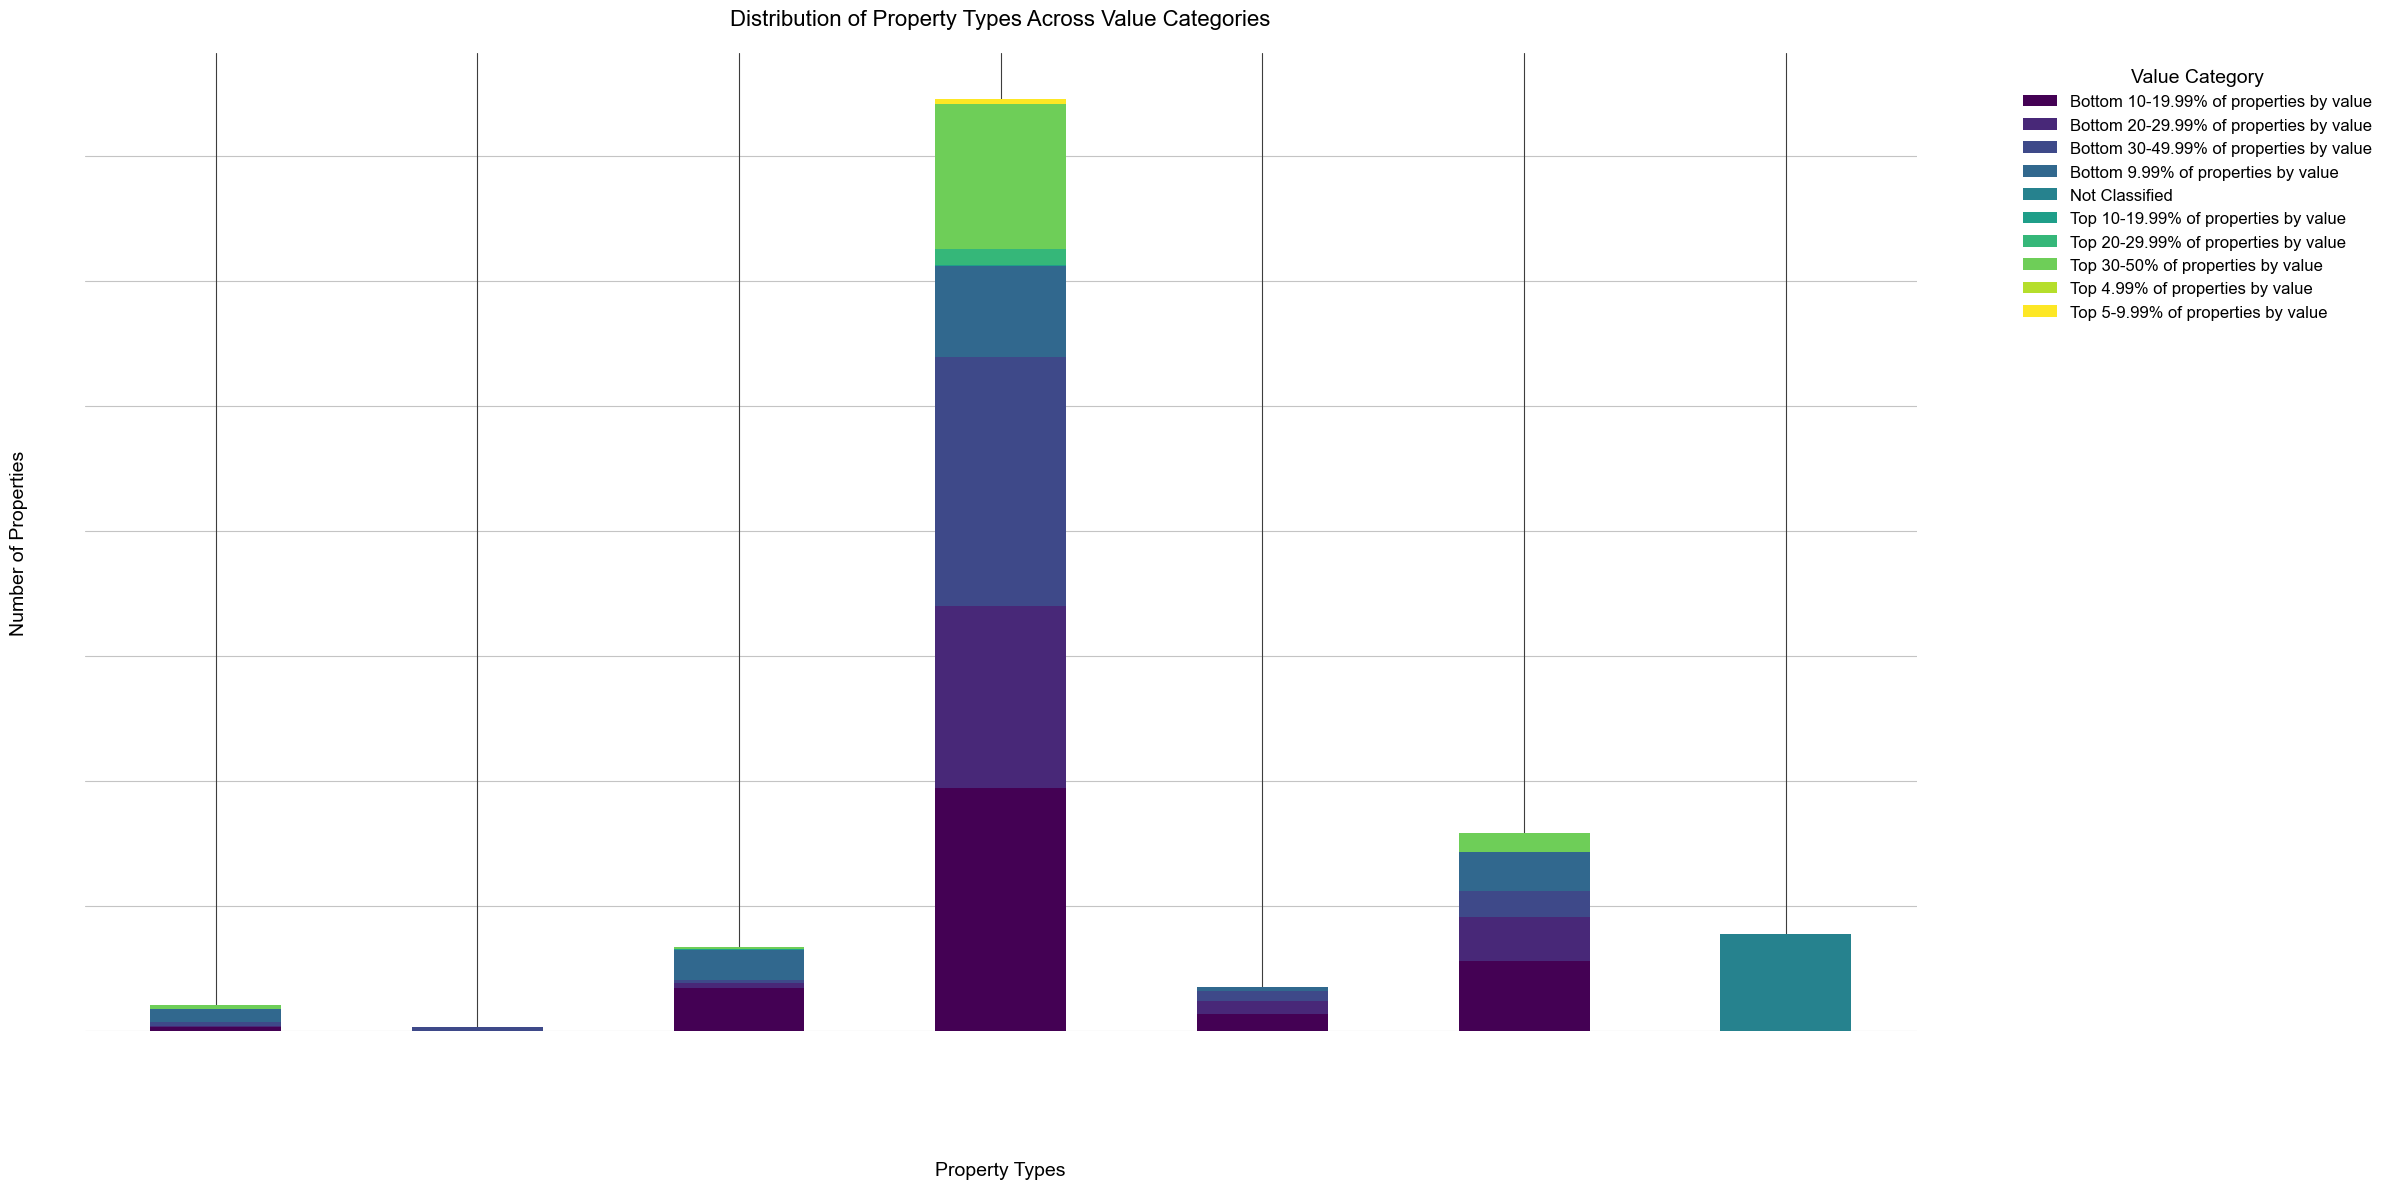

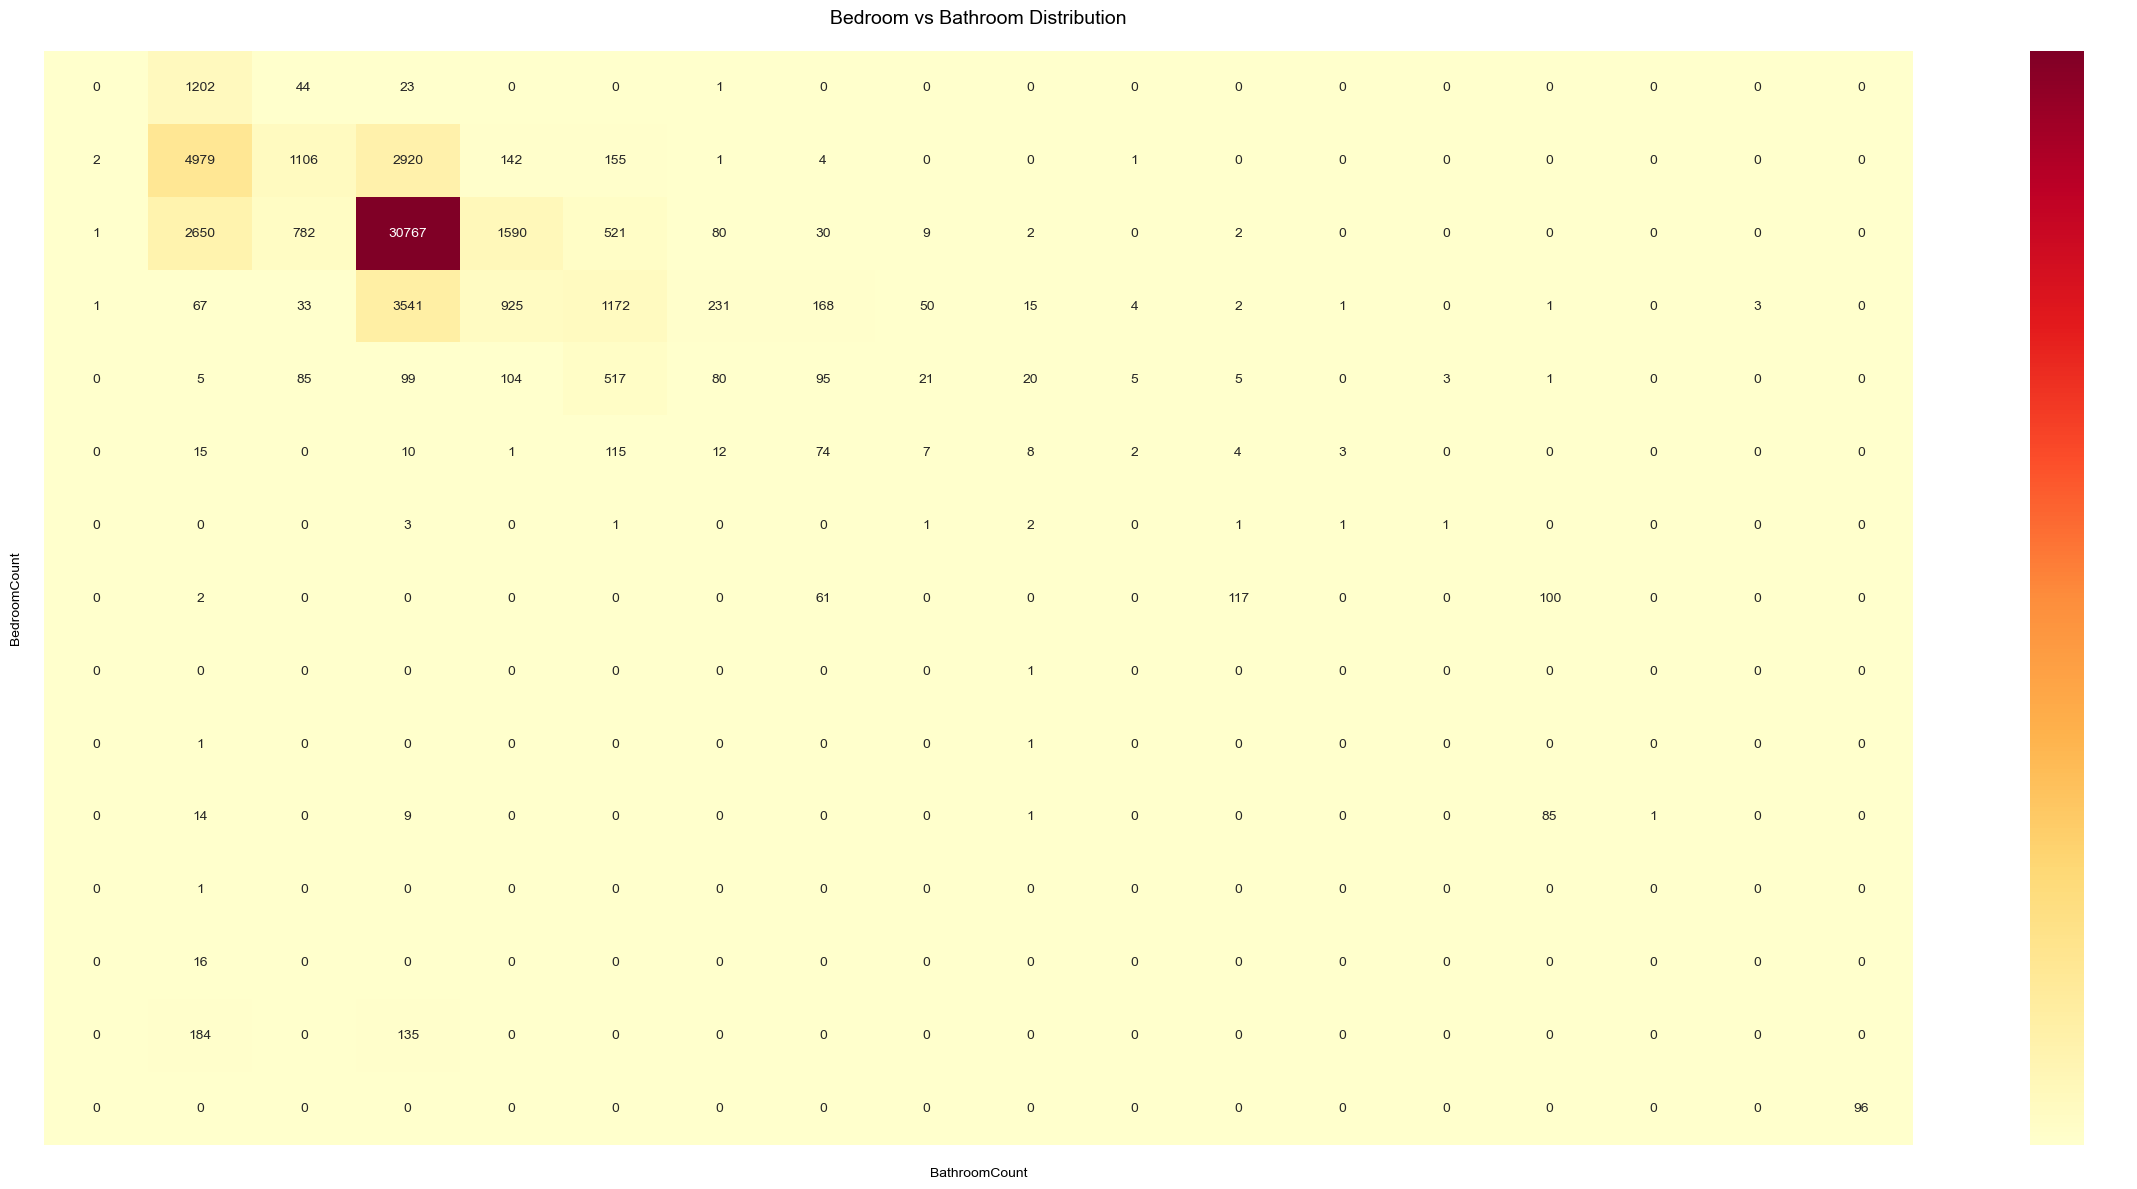

<Figure size 2400x1200 with 0 Axes>

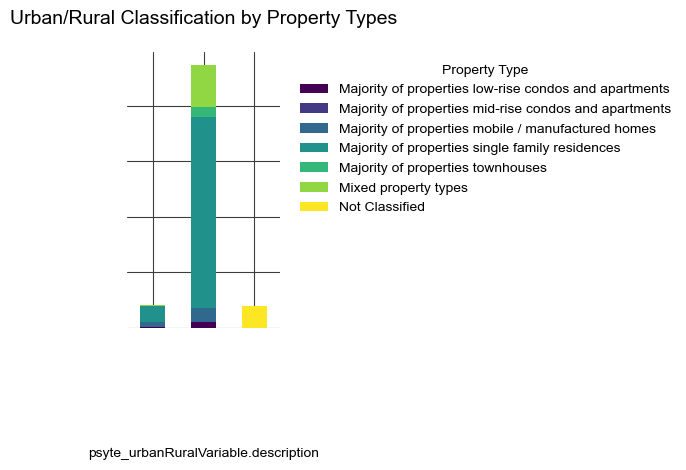

<Figure size 2400x1200 with 0 Axes>

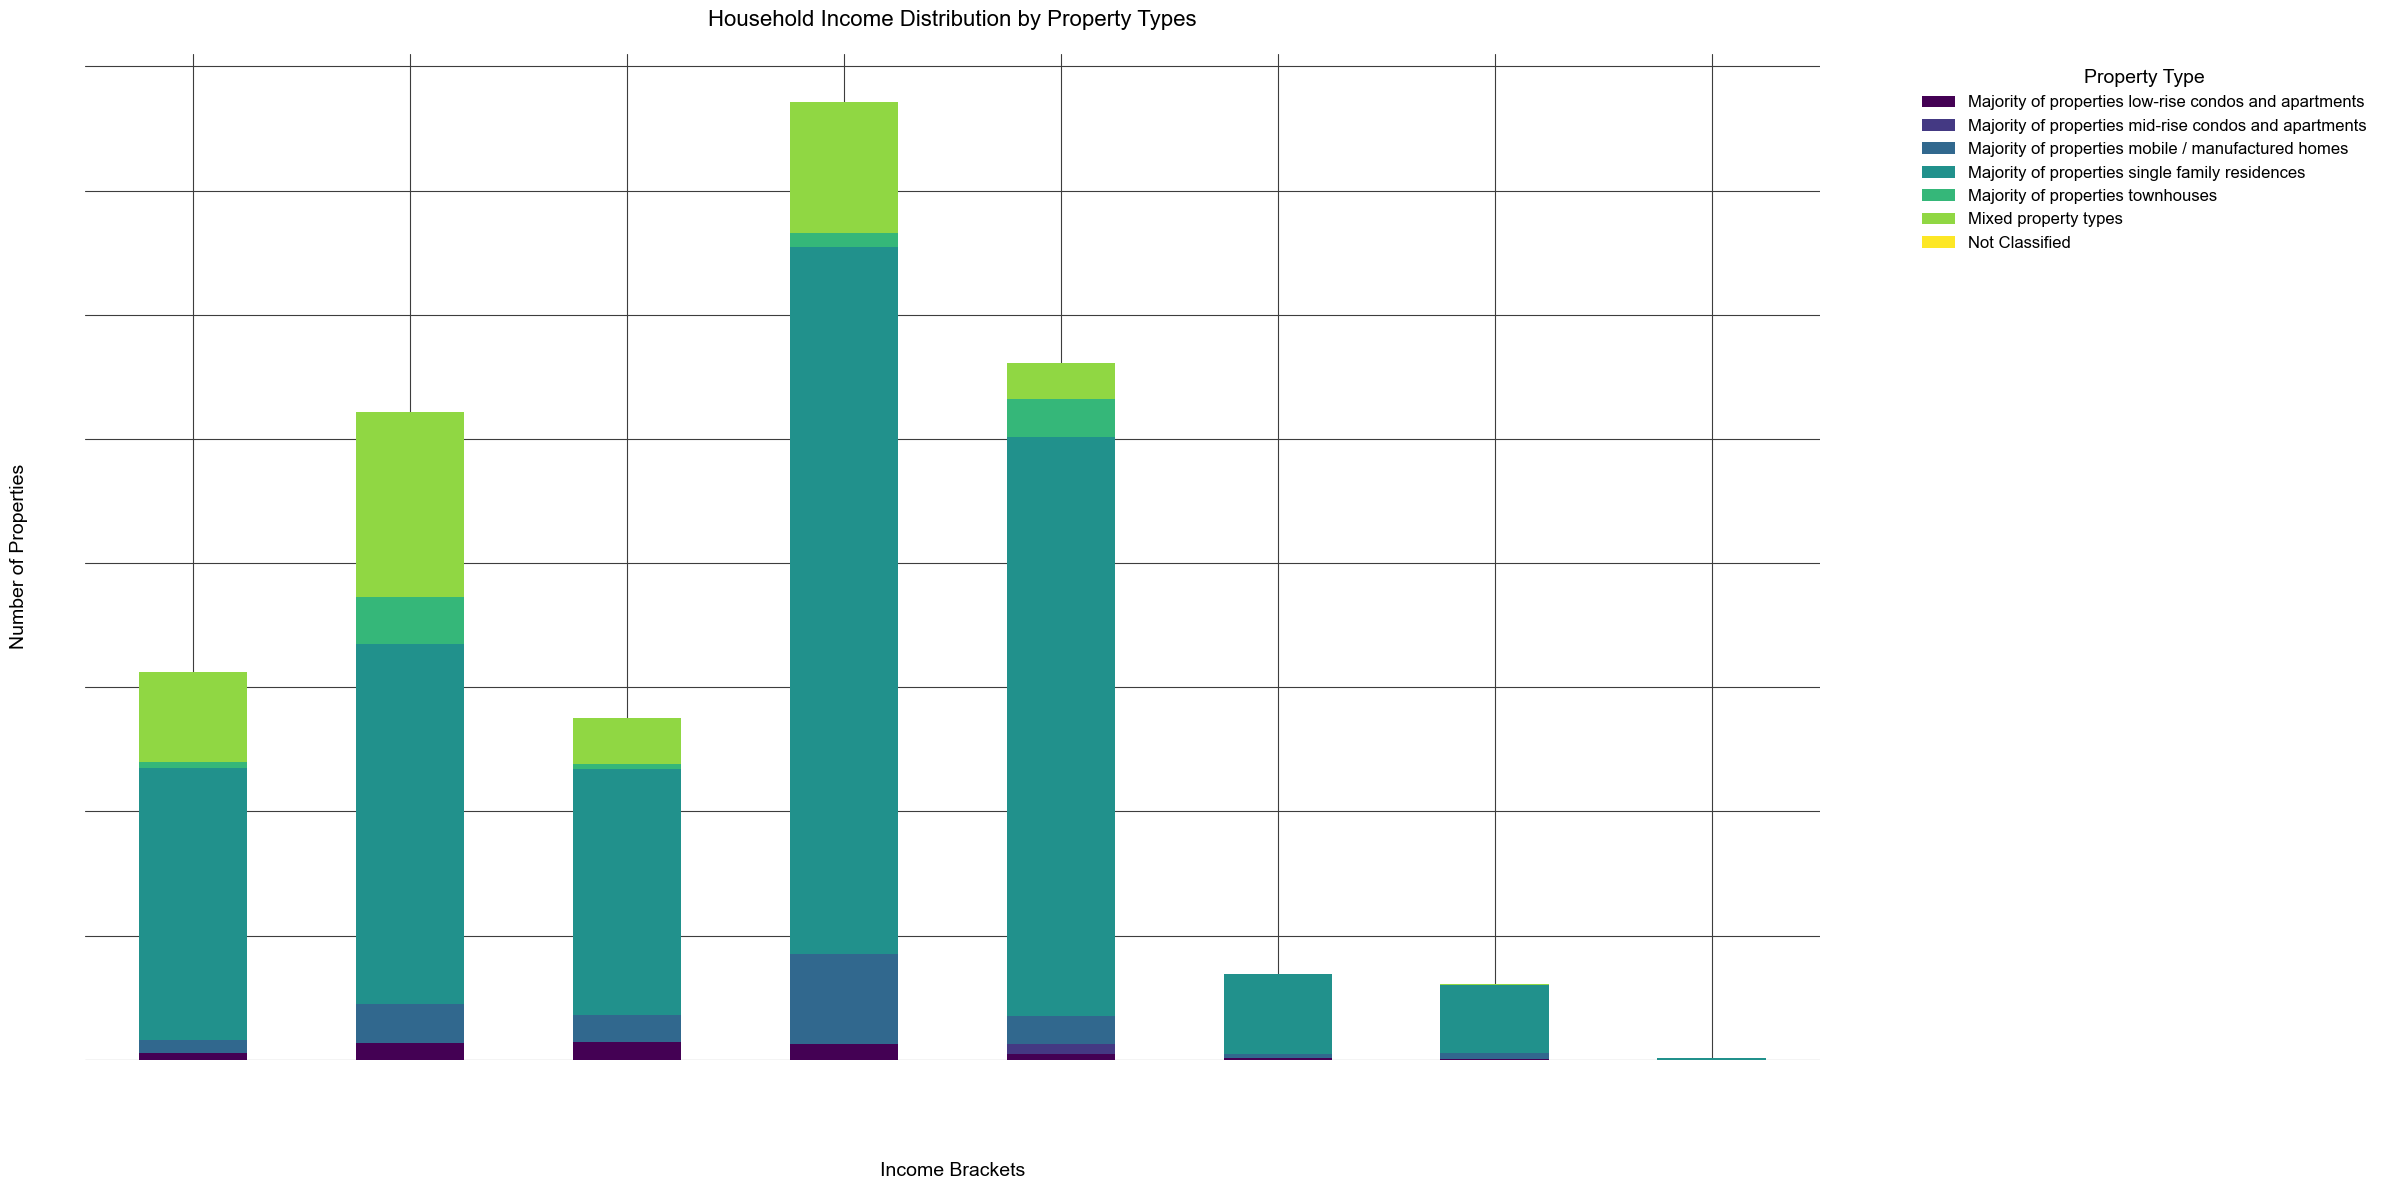

<Figure size 2400x1200 with 0 Axes>

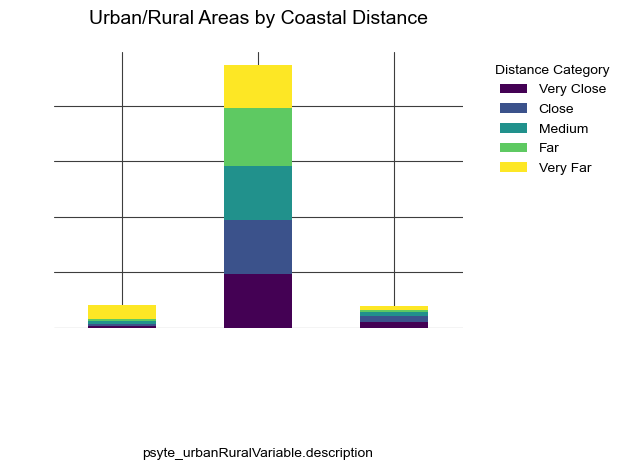

<Figure size 2400x1200 with 0 Axes>

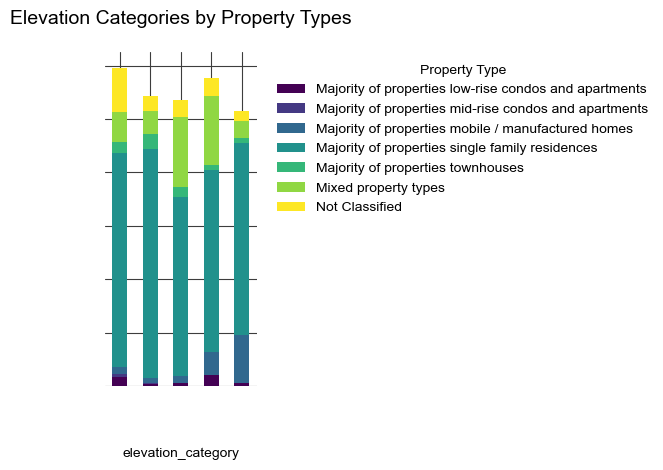

<Figure size 2400x1200 with 0 Axes>

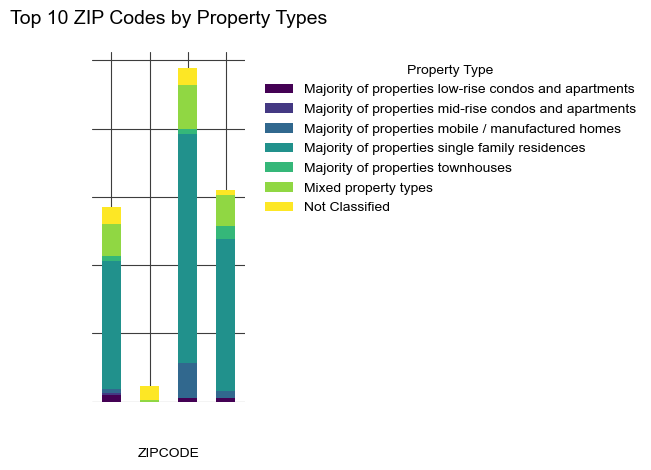

In [11]:
# Create individual plots
property_value_dist = plot_property_value_distribution(df)
bedroom_bathroom_dist = plot_bedroom_bathroom_distribution(df)
urban_rural_dist = plot_urban_rural_property_distribution(df)
income_property_dist = plot_income_property_distribution(df)
coastal_distance_dist = plot_coastal_distance_distribution(df)
elevation_property_dist = plot_elevation_property_distribution(df)
zip_code_dist = plot_zip_code_property_distribution(df)

# Generate summary statistics
stats_summary = generate_statistical_summary(df)